In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clones.data.experiments import Experiment
from clones.annotation.model_selection import ModelSelection
from clones.annotation.community import KatzLabeler, InfomapLabeler

%matplotlib inline

# load stack

In [2]:
experiment_path = '/Users/Sebi/Documents/grad_school/research/ratio/data/published/clones/yanE833/'

# load experiment
experiment = Experiment(experiment_path)

# initialize stack
stack_id = 5
stack = experiment.load_stack(experiment.stack_ids[stack_id], full=True)

# aggregate measurement data
measurements = stack.aggregate_measurements(raw=False)

# Select data

In [3]:
# filter measurement data
data = measurements
data = data[data.selected]
#data = data[data.b.between(*np.percentile(data.b.values, [0, 100]))]

# fit bayesian cell classifier

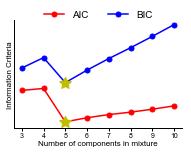

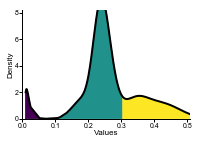

In [4]:
# fit model to measurement data
classify_on = 'r'
selector = ModelSelection(data[classify_on].values, classify_on=classify_on, max_num_components=10)
cell_classifier = selector.BIC_optimal
selector.plot_information_criteria()
#selector.plot_models(ymax=6)
cell_classifier.plot_pdf()

# score all layers in stack

In [5]:
layer_id = 0
layer = stack[layer_id]

# build graph and fit katz labeler
layer.build_graph(layer.data, logratio=True)

katz_labeler = KatzLabeler(layer.graph, cell_classifier, label='katz_genotype', alpha=0.9)
infomap_labeler = InfomapLabeler(layer.graph, cell_classifier, label='infomap_genotype', twolevel=True, rule='proportional')

# label layer
katz_labeler(layer.data)
infomap_labeler(layer.data)

layer_data = layer.data[layer.data.selected]

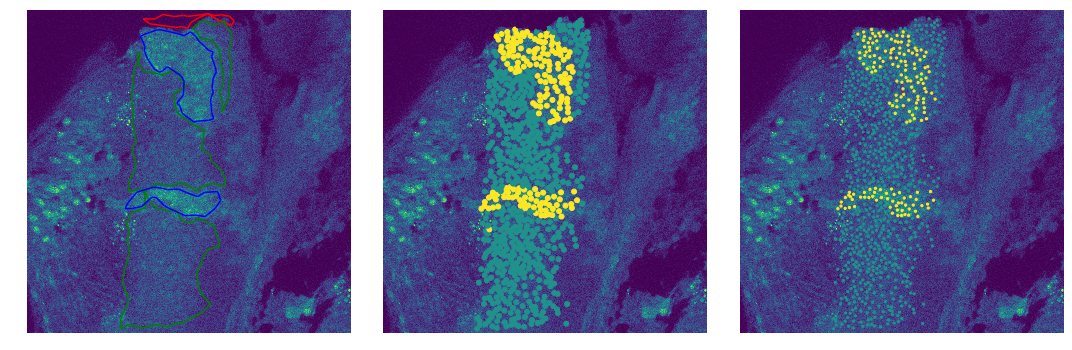

In [11]:
xy = layer_data[['centroid_x', 'centroid_y']].values
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
for ax in axes:
    _ = layer.get_channel('r').show(segments=False, ax=ax)
axes[1].scatter(*xy.T, s=25, c=layer_data.katz_genotype, cmap=plt.cm.viridis)
axes[2].scatter(*xy.T, s=5, c=layer_data.infomap_genotype, cmap=plt.cm.viridis)
plt.tight_layout()

ax = axes[0]
for label, color in zip(range(3), 'rgb'):
    xy = layer_data[layer_data.katz_genotype==label][['centroid_x', 'centroid_y']].values
    alpha = AlphaShapes(xy, 60)
    alpha.plot_boundary(color=color, ax=ax)

In [7]:
from clones.spatial.alpha import AlphaShapes


In [ ]:
# ax = axes[0]
# for g, c in zip(range(3), 'rgb'):
#     xy = layer_data[layer_data.katz_genotype==g][['centroid_x', 'centroid_y']].values
#     edges = alpha_shape(xy, alpha=50, only_outer=True)
#     f = np.vectorize(lambda x, y: is_inside(x, y, xy, edges))
#     edges_arr = np.array([edge for edge in edges])
#     lines = LineCollection(xy[edges_arr], colors=c)
#     ax.add_collection(lines)

In [67]:
from matplotlib.collections import LineCollection


In [ ]:
np.array([edge for edge in edges])

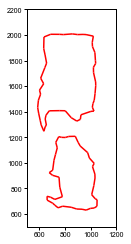

In [140]:
xy = layer_data[layer_data.katz_genotype==1][['centroid_x', 'centroid_y']].values
edges = alpha_shape(xy, alpha=50, only_outer=True)

edges_arr = np.array([edge for edge in edges])
lines = LineCollection(xy[edges_arr], colors='r')
fig, ax = plt.subplots()
ax.add_collection(lines)
ax.set_xlim(500, 1200)
ax.set_ylim(500, 2200)
ax.set_aspect(1)

In [127]:
pts = np.random.random((1000, 2))

In [128]:
mask = np.ones(xy.shape[0], dtype=bool)
mask[np.unique(edges_arr)] = False

In [129]:
pts_inside = f(*xy[mask].T)

In [100]:
f = np.vectorize(lambda x, y: is_inside(x, y, xy, edges))